# Working with SeqFish data

In [1]:
import stlearn as st

The data is downloaded from https://www.spatialomics.org/SpatialDB/download.php

Read SeqFish data and we select field 5.

In [2]:
data = st.ReadSeqFish(count_matrix_file="../Downloads/seqfish_30911168/cortex_svz_counts.matrix",
                     spatial_file="../Downloads/seqfish_30911168/cortex_svz_cellcentroids.csv",
                     field=5)

D:\Anaconda3\envs\test2\lib\site-packages\anndata-0.7.3-py3.8.egg\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Quality checking for the data

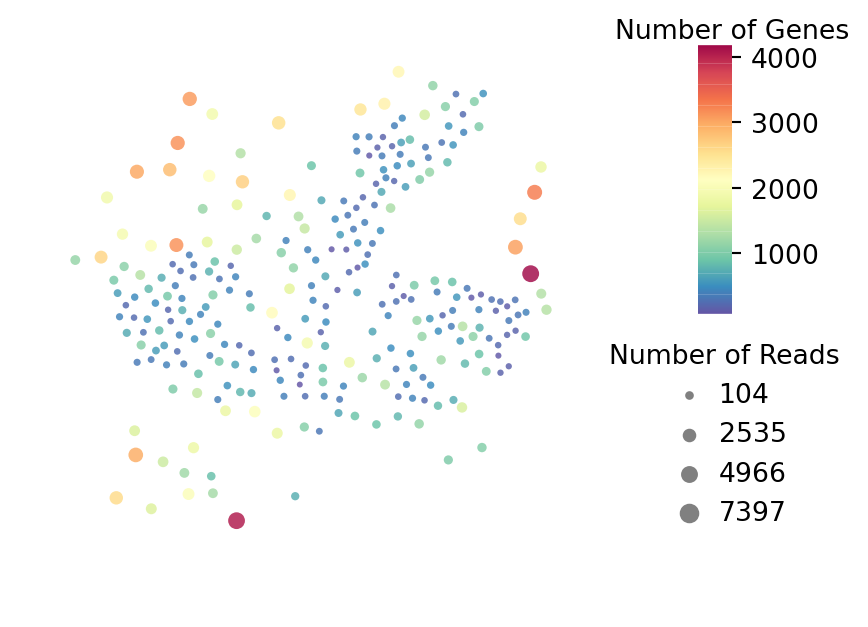

In [3]:
st.pl.QC_plot(data)

Plot gene Nr4a1

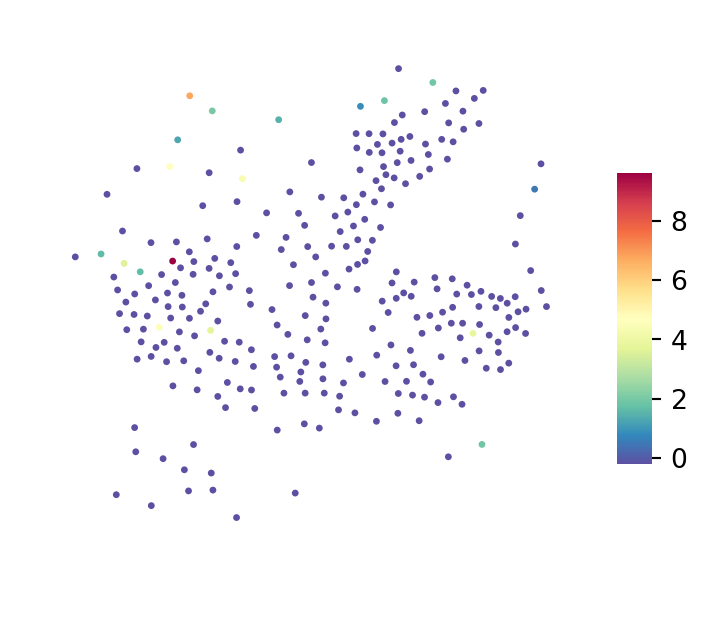

In [9]:
st.pl.gene_plot(data,genes="Nr4a1")

Running Preprocessing for MERFISH data

In [4]:
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


Running PCA to reduce the dimensions to 50

In [5]:
st.em.run_pca(data,n_comps=50,random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Perform Louvain clustering

In [6]:
st.pp.neighbors(data,n_neighbors=25)

D:\Anaconda3\envs\test2\lib\site-packages\umap_learn-0.4.3-py3.8.egg\umap\spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [7]:
st.tl.clustering.louvain(data)

Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


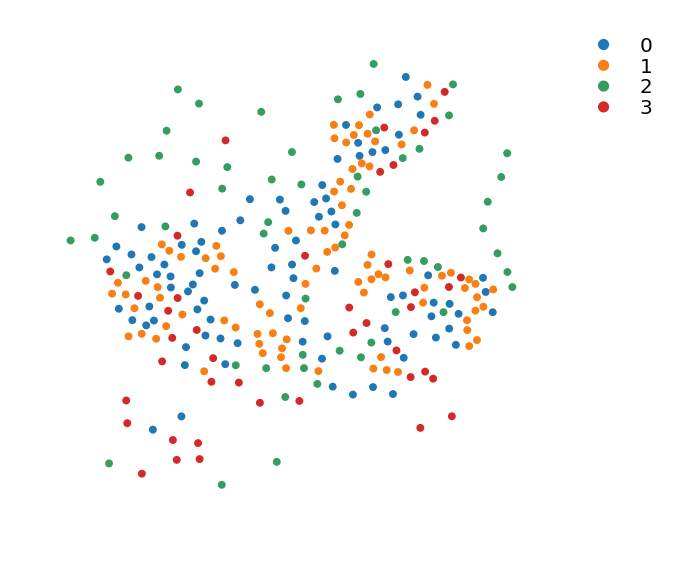

In [8]:
st.pl.cluster_plot(data,use_label="louvain",spot_size=10)